
# Clusterização de Pokemóns
## Integrantes:
Alessandra Blücher; 
Bruno Arthur Cesconetto; 
Dennis Zaramelo Felex -
2°C


## Introdução
<br>
Clusterização é a classificação não-supervisionada de dados, formando agrupamentos ou clusters. Ela representa uma das principais etapas de processos de análise de dados, denominada análise de clusters (JAIN et al., 1999).
</br>
<br>
A análise de clusters envolve, portanto, a organização de um conjunto de padrões em clusters, de acordo com alguma medida de similaridade.
</br>
<br>
### O método K-Means
<br>
O método K-Means clusteriza dados na tentativa de separar amostras em N grupos de igual variância, minimizando um critério denominado "inércia". Este algorítimo precisa de um número de clusters especifico e é eficiente ao utilizar-se uma grande quantidade de amostras, sendo utilizado em muitas aplicações e em diferentes áreas. 
</br>
<br>
O algorítimo do método K-Means divide uma amostra em K clusters diferentes, sendo cada um descrito por uma média <i>Uj</i> das variáveis separadas no clustercem questão. As médias são normalmente chamadas de "centróides" do cluster - na maioria das vezes, eles não são pontos que fazem parte das amostras, apesar de estarem no mesmo espaço. O algoritimo K-Means procura definir centroides os quais minimizem a o critério de "inercia".
</br>
<br>
A inércia é dada pela medida de quão coerentes são as variáveis postas num cluster internamente. 
</br>
<br>
•	A inércia assume que os clusters são convexos e isotrópicos, por mais que nem sempre sejam assim. Este coeficiente não é tão preciso quando os clusters forem vastos ou muito heterogêneos entre si (diferentes formas e tamanhos); 
</br>
<br>
•	A inercia não é uma métrica normalizada: sabe-se que valores baixos são os melhores e zeros constituem o caso ideal. Porém, em espaços com muitas dimensões, as distancias euclidianas tendem a se tornar “infladas”. Executar algoritmos de redução de dimensões antes de realizar a clusterização por K-Means, como o PCA, pode atenuar este problema e aumentar a velocidade dos cálculos.     
</br>

# Objetivos
<br>
O trabalho em questão buscará rotular os clusters resultantes de um dataframe de Pokémons clusterizado pelo método K-Means. Encontrando as características que definem cada cluster, é possível definir quais clusters contém os pokemóns mais fortes/fracos para as variáveis utilizadas, o que é útil para um jogador o qual quer escolher um Pokemón para uma dada ocasião: ele quer um Pokemón para ataques fulminantes? Quer se defender ao máximo? Ou quer apenas iniciar sua jornada no mundo Pokemón?
</br>

In [1]:
#importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #para gráficos estilizados
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#lendo os dataframes
pokemons = pd.read_json('pokedex.json')
itens = pd.read_json('items.json')
habilidades = pd.read_json('skills.json')
tipos = pd.read_json('types.json')

In [3]:
#abrindo o dicionário contido em pokemons.base e adicionando novas colunas ao dataframe, uma para cada atributo do dicionário: 

#criando listas as quais armazenam os valores de um mesmo atributo
Attack= []
Defense = []
HP = []
SpAtk = []
SpDef = []
Speed = []

#percorrendo o dicionário e adicionando os valores às listas
for idx, row in pokemons['base'].iteritems(): #para cada index i, em cada linha dessa coluna base...
    l=row.keys()   #l é uma variável que contempla as chaves do dicionário

    if 'Attack' in l:   #quando a variável assume a chave ataque
        Attack.append(row['Attack']) #adicionamos seu valor a lista externa "ataque"
    else:
        Attack.append(None) #caso não haja, pass
    if 'Defense' in l:
        Defense.append(row['Defense'])
    else:
        Defense.append(None)
    if 'HP' in l:
        HP.append(row['HP'])
    else:
        HP.append(None)
    if 'Sp.Atk' in l:
        SpAtk.append(row['Sp.Atk'])
    else:
        SpAtk.append(None)
    if 'Sp.Def' in l:
        SpDef.append(row['Sp.Def'])
    else:
        SpDef.append(None) 
    if 'Speed' in l:
        Speed.append(row['Speed'])
    else:
        Speed.append(None)
    
#criando as novas colunas com os valores separados
pokemons['Attack']=Attack
pokemons['Defense']=Defense
pokemons['HP']=HP
pokemons['Sp.Atk']=SpAtk
pokemons['Sp.Def']=SpDef
pokemons['Speed']=Speed


In [4]:
#selecionando as colunas de interesse do dataframe
df = pokemons[['ename','type','Attack','Defense','HP','Sp.Atk','Sp.Def','Speed']].copy()

#renomenando as colunas
df.columns = ['nome','tipo','ataque','defesa','HP','spe.atk','spe.def','velocidade']

df.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60
2,Venusaur,"[草, 毒]",82,83,80,100,100,80
3,Charmander,[炎],52,43,39,60,50,65
4,Charmeleon,[炎],64,58,58,80,65,80


## Explicação e Exemplos de aplicação de clusterização

Referência teórica para diferentes métodos de clusterzação: <br>
http://scikit-learn.org/stable/modules/clustering.html</br>

Exemplos de clusterização por K-means:<br> http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html</br>
<br>http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py</br>

# Verificando o número ideal de clusters

O método de distorção visa obter o número ideal de clusters ao se comparar o comportamento dos clusters para n clusters de uma mesma amostra. Quando a distorção passar a ter baixa variabilidade, mesmo aumentando o número de clusters, tem-se um número bom de divisões. Mais que isso torna os clusters basicamente singulares, ou seja, chegando a apenas 1 característica em específico os definindo e, menos que o ideal, deixa-os muito heterogêneos.

In [5]:
#guarando os dados em variáveis
v1 = df['ataque']
v2 = df['defesa']
v3 = df['HP']
v4 = df['spe.atk']
v5 = df['spe.def']
v6 = df['velocidade']

#as variáveis serão componentes de uma matriz
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

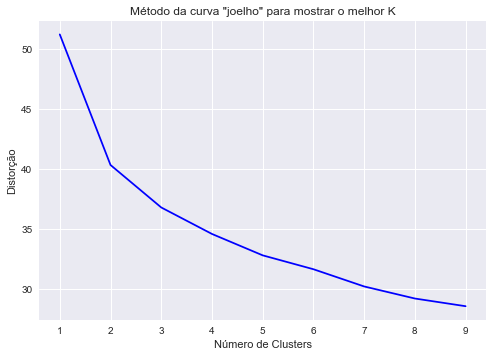

In [6]:
#kmeans determina o k ideal
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#plotando 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.title('Método da curva "joelho" para mostrar o melhor K')
plt.show()
 

Pelo gráfico acima, nota-se que 4 clusters é um número razoável para a divisão do dataframe de Pokemóns utilizado.

# Clusterizando o Dataframe

Será considerada na clusterização 4 variáveis: ataque, defesa, hp e velocidade; 
<br>
Foram escolhidas estas 4 características de cada Pokemón justamente por já serem variáveis quantitativas (são necessários valores numéricos para a clusterização que será realizada) e, por sinal, são 4 que definem habilidades muito recorrentes ao longo do jogo. Sendo assim, uma clusterização com base nestas nos dá um panorama geral do comportamento de um Pokemón em jogo: ele se sairá bem em ataques? Conseguirá se defender?
</br>
<br>
Como um gráfico 3D adimite apenas 3 variáveis, vamos "quebrar" a quarta variável em faixas e, a partir desta delimitação, será plotado o gráfico com os clusters, visualizando os pontos definidos pelas variáveis restantes dos Pokemóns os quais se encaixarem na delimitação em questão.</br>
<br>
A clusterização pelo método computacional aqui utilizado requer valores numéricos como parâmetros. Como a grande maioria das caracteríticas dos Pokemóns são qualitativas, seria necessária a conversão das mesmas em valores para tornar possível a clusterização da Pokedéx, utilizando tais características. Além disso, utilizar demasiadas características poderão tornar a interpretação dos resultados muito difícil, dado que os clusters resultantes poderiam ser muito heterogêneos ou muito específicos, além de não ser possível plotar gráficos com mais de 3 variáveis por vez, conforme mencionado anteriormente. 
</br>

In [7]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
df.loc[:,'cluster'] = kmeans.labels_ #indentificando cada um dos pokemóns por seu cluster numa nova coluna, em caso de futuro material de análise

# Função-Plot do fit realizado pelo Kmeans 

In [8]:
#função que plota o gráfico com os clusters


def showcluster(info, k, color, titulo, fig,q): #q refere-se aos 3 digitos passados ao subplot (n° colunas, linhas e posição)
    ax = fig.add_subplot(q, projection='3d')
    ax.set_title(titulo)
    ax.set_xlabel(str(info[0].name))
    ax.set_ylabel(str(info[1].name))
    ax.set_zlabel(str(info[2].name))
    ax.set_xlim(0, 160)  
    ax.set_ylim(0, 160)
    ax.set_zlim(0, 160)    #250 para aparecer todos os pontos dentro da escala (incluindo os aberrantes)
    for i in range(0,k):
        ax.scatter(info[0][df.cluster==i], info[1][df.cluster==i], info[2][df.cluster==i], marker='o', c=color[i])

colors = ['orange','grey','brown','pink']



# Clusterização com base na delimitação de uma das variáveis

### Para dado poder de ataque, como as outras três variáveis são distribuídas?

In [9]:
#ataques baixos
ataque40 = df[df.ataque<=40].copy()

#variáveis que comporão a matriz para o fit (cada variável contém os valores de uma das colunas de interesse)
v1 = ataque40['ataque']
v2 = ataque40['defesa']
v3 = ataque40['HP']
v4 = ataque40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4) #arranjo numa matriz

In [10]:
kmeans = KMeans(n_clusters=4).fit(X) #clusterização realizada pelo módulo python
y_kmeans = kmeans.predict(X)
ataque40.loc[:,'cluster'] = kmeans.labels_

In [11]:
#ataques médios
ataque80 = df[(df['ataque']>40) & (df['ataque'] <= 80)].copy()
#repetindo o processo de clusterização
v1 = ataque80['ataque']
v2 = ataque80['defesa']
v3 = ataque80['HP']
v4 = ataque80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [12]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
ataque80.loc[:,'cluster'] = kmeans.labels_

In [13]:
#ataques fortes
ataquef = df[df['ataque'] > 80].copy()
#repetindo o processo de clusterização
v1 = ataquef['ataque']
v2 = ataquef['defesa']
v3 = ataquef['HP']
v4 = ataquef['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [14]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
ataquef.loc[:,'cluster'] = kmeans.labels_


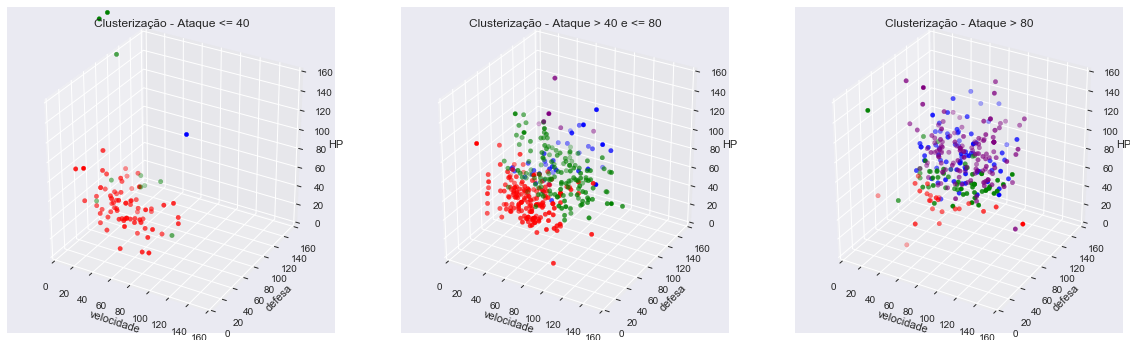

In [15]:
#área de plotagem
fig = plt.figure(figsize=[20,6])

plot = showcluster([ataque40.velocidade,ataque40.defesa,ataque40.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Ataque <= 40', fig,131)

plot = showcluster([ataque80.velocidade,ataque80.defesa,ataque80.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Ataque > 40 e <= 80',fig,132)

plot = showcluster([ataquef.velocidade,ataquef.defesa,ataquef.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Ataque > 80',fig,133)

plt.show()


Os gráficos de dispersão acima se referem a delimitação da variável ataque. No primeiro gráfico, à esquerda, houve algum problema em que não estão aparecendo todos os Pokemóns pertecentes a essa delimitação. Isso pode ser dado por pontos sobrepostos, nos quais o algorítmo acaba por utilizar uma cor só para a plotagem, camuflando Pokemóns de outros clusters. De qualquer maneira, é possível perceber que, para ataques baixos, boa parte dos pontos se encontram num range de defesas e HP também baixos. Em um outro cluster, nota-se um aumento nos níveis de defesa e há ainda pontos aberrantes, os quais possuem algum dos atributos (defesa ou HP) extremamente altos, em comparação aos seus respectivos pontos de ataque.
<br>
No gráfico central, cuja variável ataque está num range intermediário, os clusters começam a se aglomerar, o que torna a diferenciação mais complicada. Mesmo assim, é possível interpretar que um cluster contém Pokemóns com defesas baixas e médias, outro possui defesas mais altas que o anterior e, um outro destaca-se pelo HP mais alto em relaçao aos demais. Nota-se tamém que, para nenhum dos clusters, há altos níveis de velocidade. 
</br>
<br>
No gráfico à direita a categorização torna-se ainda mais dificil, tornando uma rotulação do que definiu a escolha de cada cluster passível de erro. Dado isso, recorreremos ao dataframe em si, mais adiante, a partir de um value_counts de quantos Pokemóns foram encaixados em cada cluster.
</br>

### Porcentagem dos Pokemóns clusterizados por cluster

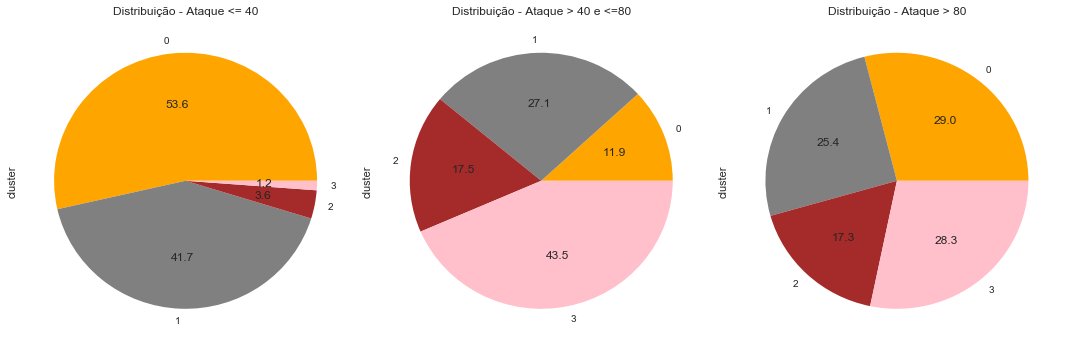

In [16]:
#value_counts
a40vc=(ataque40.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
a80vc=(ataque80.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
afvc = (ataquef.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#área de plotagem
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = a40vc.plot(kind='pie',title='Distribuição - Ataque <= 40',autopct='%.1f', colors=colors)

plt.subplot(132)
plot = a80vc.plot(kind='pie',title='Distribuição - Ataque > 40 e <=80',autopct='%.1f', colors=colors)

plt.subplot(133)
plot = afvc.plot(kind='pie',title='Distribuição - Ataque > 80',autopct='%.1f', colors=colors)

plt.tight_layout()
plt.show()


### Para dada capacidade de defesa, como as outras três variáveis são distribuídas?

In [17]:
#defesas baixas
defesa40 = df[df.defesa<=40].copy()

#repetindo o processo de clusterização
v1 = defesa40['ataque']
v2 = defesa40['defesa']
v3 = defesa40['HP']
v4 = defesa40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [18]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesa40.loc[:,'cluster'] = kmeans.labels_

In [19]:
#defesas médias
defesa80 = df[(df['defesa']>40) & (df['defesa'] <= 80)].copy()
#repetindo o processo de clusterização
v1 = defesa80['ataque']
v2 = defesa80['defesa']
v3 = defesa80['HP']
v4 = defesa80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [20]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesa80.loc[:,'cluster'] = kmeans.labels_

In [21]:
#defesas fortes
defesaf = df[df['defesa'] > 80].copy()
#repetindo o processo de clusterização
v1 = defesaf['ataque']
v2 = defesaf['defesa']
v3 = defesaf['HP']
v4 = defesaf['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [22]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
defesaf.loc[:,'cluster'] = kmeans.labels_

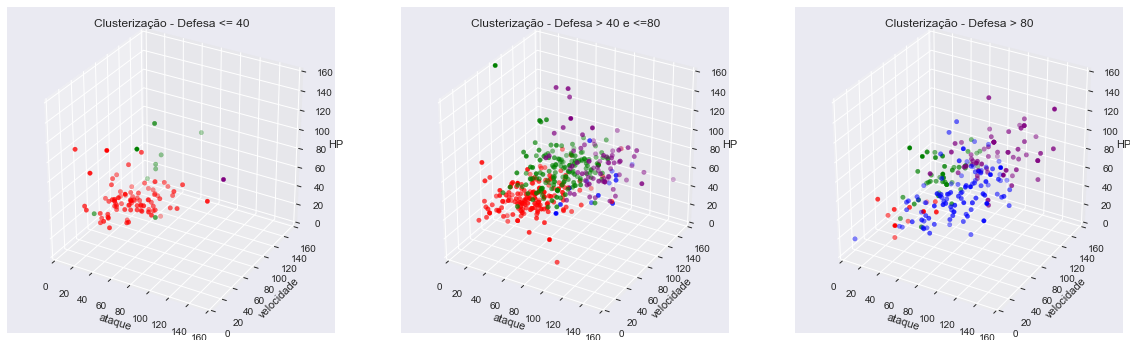

In [23]:
#área de plotagem
fig = plt.figure(figsize=[20,6])

plot = showcluster([defesa40.ataque,defesa40.velocidade,defesa40.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Defesa <= 40', fig,131)

plot = showcluster([defesa80.ataque,defesa80.velocidade,defesa80.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Defesa > 40 e <=80', fig,132)

plot = showcluster([defesaf.ataque,defesaf.velocidade,defesaf.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Defesa > 80', fig,133)

plt.show()

Novamente, percebe-se que conforme a delimitação da variável escolhida é dada em valores maiores, mais dificil torna-se a interpretação de como foram divididos os mesmos Pokemóns. Isso indica que talvez a visualização gráfica de 4 variáveis, a partir da delimitação de uma variável, talvez não seja a maneira mais eficiente de rotular os clusters obtidos. 
<br>
De qualquer maneira, no gráfico à direita, destacam-se dois clusters, nos quais um deles contém Pokemóns de alto HP e Velocidade e um outro, em que estas variáveis não são tão altas.
</br>

### Porcentagem dos Pokemóns clusterizados por cluster

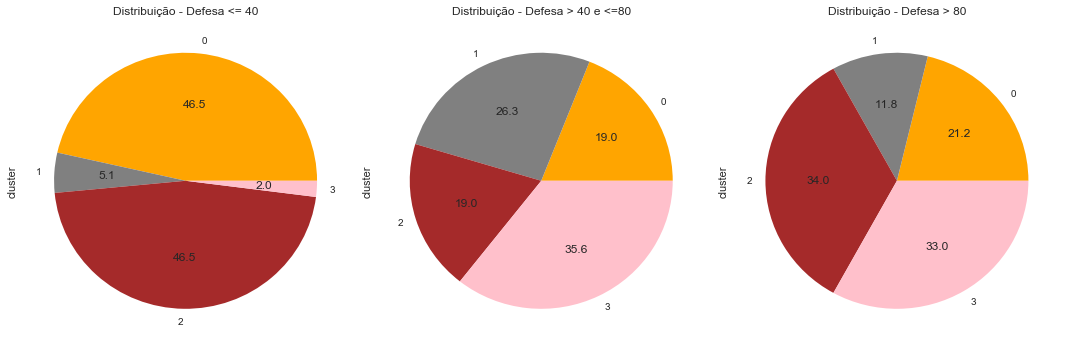

In [24]:
#value_counts
d40vc=(defesa40.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
d80vc=(defesa80.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
dfvc=(defesaf.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#área de plotagem
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = d40vc.plot(kind='pie',title='Distribuição - Defesa <= 40',autopct='%.1f', colors=colors)

plt.subplot(132)
plot = d80vc.plot(kind='pie',title='Distribuição - Defesa > 40 e <=80',autopct='%.1f', colors=colors)

plt.subplot(133)
plot = dfvc.plot(kind='pie',title='Distribuição - Defesa > 80',autopct='%.1f', colors=colors)

plt.tight_layout()
plt.show()


   ### Para dado nível de HP, como as outras três variáveis são distribuídas?

In [25]:
#HP baixo
HP40 = df[df.HP<=40].copy()

#repetindo o processo de clusterização
v1 = HP40['ataque']
v2 = HP40['defesa']
v3 = HP40['HP']
v4 = HP40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [26]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HP40.loc[:,'cluster'] = kmeans.labels_

In [27]:
#HP médio
HP80 = df[(df['HP']>40) & (df['HP'] <= 80)].copy()
#repetindo o processo de clusterização
v1 = HP80['ataque']
v2 = HP80['defesa']
v3 = HP80['HP']
v4 = HP80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [28]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HP80.loc[:,'cluster'] = kmeans.labels_

In [29]:
#HP alto
HPa = df[df['HP'] > 80].copy()
#repetindo o processo de clusterização
v1 = HPa['ataque']
v2 = HPa['defesa']
v3 = HPa['HP']
v4 = HPa['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [30]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
HPa.loc[:,'cluster'] = kmeans.labels_

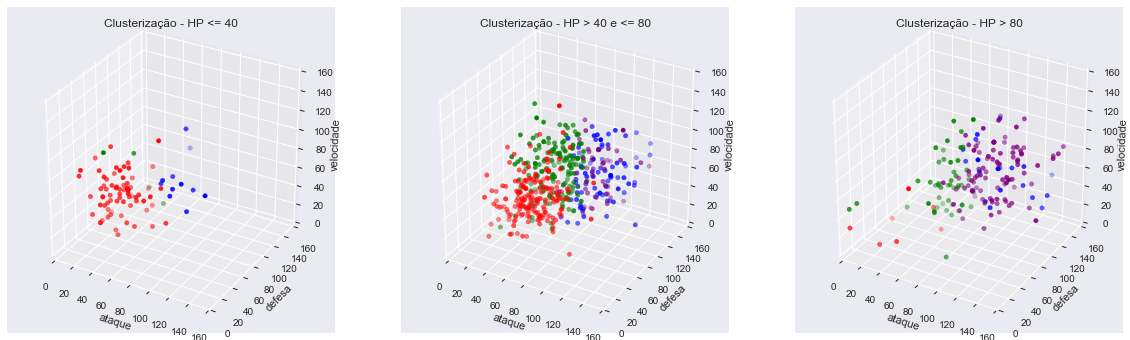

In [31]:
#área de plotagem

fig = plt.figure(figsize=[20,6])

plot = showcluster([HP40.ataque,HP40.defesa,HP40.velocidade],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - HP <= 40', fig,131)

plot = showcluster([HP80.ataque,HP80.defesa,HP80.velocidade],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - HP > 40 e <= 80', fig,132)

plot = showcluster([HPa.ataque,HPa.defesa,HPa.velocidade],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - HP > 80', fig,133)

plt.show()


Os mesmos problemas para uma interpretação se repetem com a delimitação da variável HP: alguns clusters são "enxergáveis" em dado gráfico, porém não em outro. Uma tendência vista nas 3 áreas de plotagem até agora é a de que para valores intermediários da variável delimitada, os clusters estão fortemente embaralhados, o que indica uma distribuição muito heterogênea dos Pokemóns, como se houvesse um pouco de cada "tipo" de Pokemón em cada um dos 4 clusters. 

### Porcentagem dos Pokemóns clusterizados por cluster

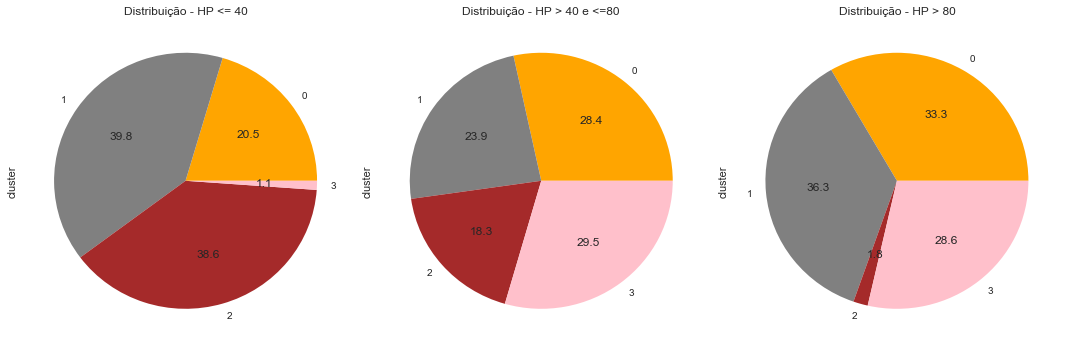

In [32]:
#value_counts
hp40vc=(HP40.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
hp80vc=(HP80.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
hpavc=(HPa.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#área de plotagem
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = hp40vc.plot(kind='pie',title='Distribuição - HP <= 40',autopct='%.1f', colors=colors)

plt.subplot(132)
plot = hp80vc.plot(kind='pie',title='Distribuição - HP > 40 e <=80',autopct='%.1f', colors=colors)

plt.subplot(133)
plot = hpavc.plot(kind='pie',title='Distribuição - HP > 80',autopct='%.1f', colors=colors)

plt.tight_layout()
plt.show()


### Para dada velocidade do pokemón, como as outras três variáveis são distribuídas?

In [33]:
#Velocidade baixa
V40 = df[df.velocidade<=40].copy()

#repetindo o processo de clusterização
v1 = V40['ataque']
v2 = V40['defesa']
v3 = V40['HP']
v4 = V40['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [34]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
V40.loc[:,'cluster'] = kmeans.labels_

In [35]:
#Velocidade média
V80 = df[(df['velocidade']>40) & (df['velocidade'] <= 80)].copy()
#repetindo o processo de clusterização
v1 = V80['ataque']
v2 = V80['defesa']
v3 = V80['HP']
v4 = V80['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [36]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
V80.loc[:,'cluster'] = kmeans.labels_

In [37]:
#Velocidade alta
Va = df[df['velocidade'] > 80].copy()
#repetindo o processo de clusterização
v1 = Va['ataque']
v2 = Va['defesa']
v3 = Va['HP']
v4 = Va['velocidade']
X=np.array(list(zip(v1,v2,v3,v4))).reshape(len(v1),4)

In [38]:
kmeans = KMeans(n_clusters=4).fit(X)
y_kmeans = kmeans.predict(X)
Va.loc[:,'cluster'] = kmeans.labels_

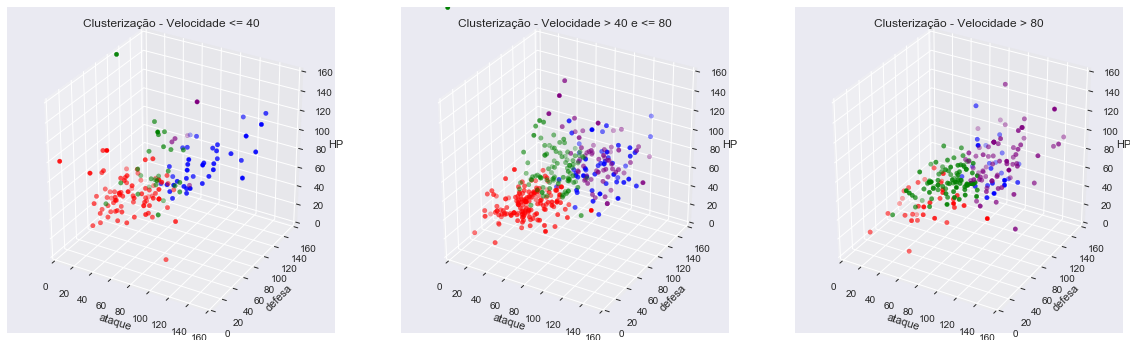

In [39]:
#área de plotagem
fig = plt.figure(figsize=[20,6])

plot = showcluster([V40.ataque,V40.defesa,V40.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Velocidade <= 40', fig,131)

plot = showcluster([V80.ataque,V80.defesa,V80.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Velocidade > 40 e <= 80', fig,132)

plot = showcluster([Va.ataque,Va.defesa,Va.HP],4,[['red'],['green'],['blue'],['purple']], 'Clusterização - Velocidade > 80', fig,133)

plt.show()

Visto que, a dificuldade persistiu em na caracterização de certos clusters, a maneira mais precisa possível para encontrar um rótulo será analisando o dataframe original, cluster a cluster, o que será feito mais abaixo.
<br>
Nessa seção, delimitando a velocidade do Pokemón, percebem-se clusters com alto HP e defesa, porém com baixos valores de ataque e, em reflexo, um outro cluster no qual há baixos valores de defesa e HP.
</br>

### Porcentagem dos Pokemóns clusterizados por cluster

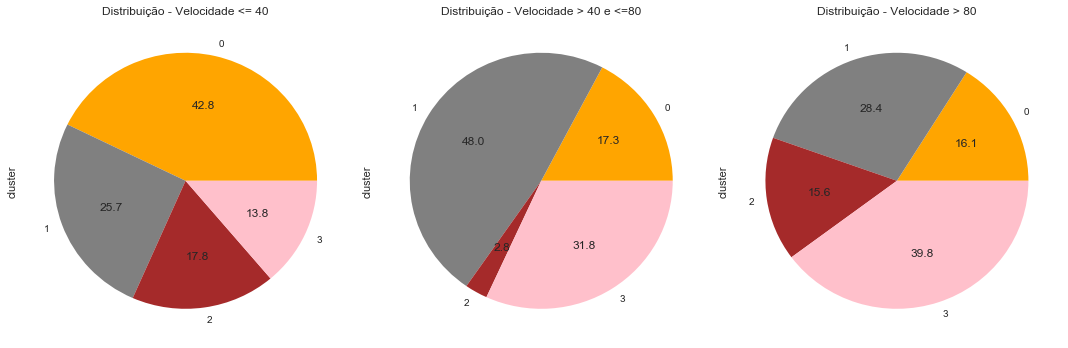

In [40]:
#value_counts
v40vc=(V40.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
v80vc=(V80.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)
vavc=(Va.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#área de plotagem

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = v40vc.plot(kind='pie',title='Distribuição - Velocidade <= 40',autopct='%.1f', colors=colors)

plt.subplot(132)
plot = v80vc.plot(kind='pie',title='Distribuição - Velocidade > 40 e <=80',autopct='%.1f', colors=colors)

plt.subplot(133)
plot = vavc.plot(kind='pie',title='Distribuição - Velocidade > 80',autopct='%.1f', colors=colors)

plt.tight_layout()
plt.show()


## Por fim, será analisado o dataframe completo, também filtrado por cluster:

Justamente pela dificuldade encontrada em classificar clusters com base nos gráficos 3D, aqui, há a análise do dataframe completo, com as 4 variáveis e cada Pokemón, o qual estará em um dos 4 clusters, os quais foram calculados levando em conta todas as variáveis envolvidas no projeto.
<br>
A finalidade dos gráficos de setores é verificar a relevância (ou não) de um cluster → Dentre todos os Pokemóns pertecentes a uma delimitação, quais clusters possuem a maior parte deles? Assim, é possível verificar, por exemplo, que o Cluster 2 é relevante para uma delimitação de ataque alta, mas não é relevante para uma delimitação de ataque baixa, e assim por diante.
</br>

In [41]:
#filtragem
cluster0 = df[df.cluster==0]
cluster1 = df[df.cluster==1]
cluster2 = df[df.cluster==2]
cluster3 = df[df.cluster==3]

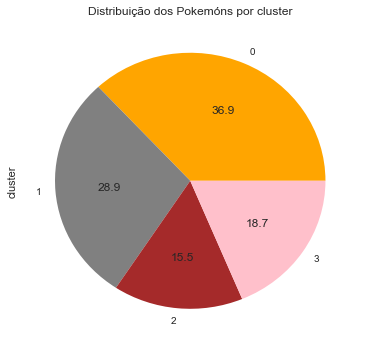

In [42]:
#value_counts
dfvc=(df.cluster.value_counts(sort=False, normalize=True)*100).round(decimals=2)

#plot
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = dfvc.plot(kind='pie',title='Distribuição dos Pokemóns por cluster',autopct='%.1f', colors=colors)
plt.tight_layout()
plt.show()

# Cluster 0

In [43]:
def deef(bloco):
    for i in bloco:
        print("media de ", i.name, ": ",i.mean())
        
    print('A média das variáveis utilizadas dos Pokémons do cluster é de:', (bloco[0].mean()+bloco[1].mean()+bloco[2].mean()+bloco[3].mean())/4)
    print('O desvio padrão de ataque dos Pokémons do cluster é de:', bloco[0].std())
    print('O desvio padrão de defesa dos Pokémons do cluster é de:', bloco[1].std())
    print('O desvio padrão de HP dos Pokémons do cluster é de:', bloco[2].std())
    print('O desvio padrão de velocidade dos Pokémons do cluster é de:', bloco[3].std())
    print('O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster é de:', (bloco[0].std()+bloco[1].std()+bloco[2].std()+bloco[3].std())/4)
    return 0

In [44]:
cluster0.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
0,Bulbasaur,"[草, 毒]",49,49,45,65,65,45,0
3,Charmander,[炎],52,43,39,60,50,65,0
6,Squirtle,[水],48,65,44,50,64,43,0
9,Caterpie,[虫],30,35,45,20,20,45,0
10,Metapod,[虫],20,55,50,25,25,30,0


In [45]:
deef([cluster0.ataque,cluster0.defesa,cluster0.HP,cluster0.velocidade])

media de  ataque :  53.473684210526315
media de  defesa :  48.973684210526315
media de  HP :  50.30075187969925
media de  velocidade :  54.37593984962406
A média das variáveis utilizadas dos Pokémons do cluster é de: 51.78101503759399
O desvio padrão de ataque dos Pokémons do cluster é de: 19.37887546530759
O desvio padrão de defesa dos Pokémons do cluster é de: 14.973790408762945
O desvio padrão de HP dos Pokémons do cluster é de: 14.498398070212946
O desvio padrão de velocidade dos Pokémons do cluster é de: 22.729285075794746
O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster é de: 17.895087255019558


0

# Cluster 1

In [46]:
cluster1.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
1,Ivysaur,"[草, 毒]",62,63,60,80,80,60,1
2,Venusaur,"[草, 毒]",82,83,80,100,100,80,1
4,Charmeleon,[炎],64,58,58,80,65,80,1
5,Charizard,"[炎, 飞行]",84,78,78,109,85,100,1
7,Wartortle,[水],63,80,59,65,80,58,1


In [47]:
deef([cluster1.ataque,cluster1.defesa,cluster1.HP,cluster1.velocidade])

media de  ataque :  70.16826923076923
media de  defesa :  68.27884615384616
media de  HP :  75.44711538461539
media de  velocidade :  75.59615384615384
A média das variáveis utilizadas dos Pokémons do cluster é de: 72.37259615384616
O desvio padrão de ataque dos Pokémons do cluster é de: 16.759035428316004
O desvio padrão de defesa dos Pokémons do cluster é de: 17.451357784346754
O desvio padrão de HP dos Pokémons do cluster é de: 25.511711648815766
O desvio padrão de velocidade dos Pokémons do cluster é de: 27.170963199236873
O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster é de: 21.72326701517885


0

# Cluster 2

In [48]:
cluster2.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
27,Sandslash,[地上],100,110,75,45,55,65,2
46,Parasect,"[虫, 草]",95,80,60,60,80,30,2
66,Machoke,[格斗],100,70,80,50,60,45,2
73,Geodude,"[岩石, 地上]",80,100,40,30,30,20,2
74,Graveler,"[岩石, 地上]",95,115,55,45,45,35,2


In [49]:
deef([cluster2.ataque,cluster2.defesa,cluster2.HP,cluster2.velocidade])

media de  ataque :  91.53571428571429
media de  defesa :  112.90178571428571
media de  HP :  66.60714285714286
media de  velocidade :  56.098214285714285
A média das variáveis utilizadas dos Pokémons do cluster é de: 81.78571428571429
O desvio padrão de ataque dos Pokémons do cluster é de: 23.583827322911585
O desvio padrão de defesa dos Pokémons do cluster é de: 29.958517813391396
O desvio padrão de HP dos Pokémons do cluster é de: 19.242575328596356
O desvio padrão de velocidade dos Pokémons do cluster é de: 26.516002246961655
O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster é de: 24.82523067796525


0

# Cluster 3

In [50]:
cluster3.head()

,nome,tipo,ataque,defesa,HP,spe.atk,spe.def,velocidade,cluster
30,Nidoqueen,"[毒, 地上]",92,87,90,75,85,76,3
33,Nidoking,"[毒, 地上]",102,77,81,85,75,85,3
58,Arcanine,[炎],110,80,90,100,80,95,3
61,Poliwrath,"[水, 格斗]",95,95,90,70,90,70,3
67,Machamp,[格斗],130,80,90,65,85,55,3


In [51]:
deef([cluster3.ataque,cluster3.defesa,cluster3.HP,cluster3.velocidade])

media de  ataque :  111.39259259259259
media de  defesa :  82.86666666666666
media de  HP :  94.58518518518518
media de  velocidade :  81.28888888888889
A média das variáveis utilizadas dos Pokémons do cluster é de: 92.53333333333333
O desvio padrão de ataque dos Pokémons do cluster é de: 19.103838911034362
O desvio padrão de defesa dos Pokémons do cluster é de: 19.4559586851486
O desvio padrão de HP dos Pokémons do cluster é de: 21.00724295321262
O desvio padrão de velocidade dos Pokémons do cluster é de: 23.851489101066807
O desvio padrão médio das variáveis utilizadas dos Pokémons do cluster é de: 20.854632412615597


0

# Como são os Pokemóns?

Abaixo, há um exemplo de carta de um Pokemón. Há diversas características as quais compõem um deles. Neste projeto, utilizou-se apenas valores de ataque, defesa, HP e Velocidade, sendo alguns destes valores nem presentes nas cartas, mas apenas em versões eletrônicas do jogo. É relevante para o projeto o item Categoria (canto superior esquerdo da carta). As categorias nada mais são que os "níveis" dos Pokemóns, que saem do básico e passam pelos estágios 1 e 2, além de estágios especiais, os quais tornam os pokemóns muito poderosos. 

<img src='carta.jpg' >

Geralmente Pokémons básicos tem poucos pontos de saúde, custo de recuo e de energia baixos, e são cards comuns de serem encontrados (Valendo também para as versões eletrônicas)


<img src ='basicos.jpg'>

Um card estágio 1 é considerado como um card de evolução, evoluindo de um Pokémon básico correspondente. Normalmente Pokémons estágio 1 tem mais pontos de saúde, custo de recuo e de energia medianos, e são cards incomuns de serem encontrados.

<img src = 'stage1.jpg'>

Um card estágio 2 também é considerado como um card de evolução, evoluindo de um Pokémon estágio 1 correspondente. Normalmente Pokémons estágio 2 tem muitos pontos de saúde, custo de recuo e de energia altos, e são cards raros de serem encontrados.

<img src = 'stage 2.jpg'>

Os Pokémons EX são caracterizados por possuírem mais pontos de saúde do que os de outras categorias, além de terem ataques e habilidades mais poderosos.

<img src = 'EX.jpg'>

Os Pokémons LV. X são Pokémons mais fortes do que os normais, como se estivessem no Lv 100 nos jogos. Eles podem usar os ataques e habilidades de seu "estágio" anterior, tendo mais pontos de saúde e novos ataques. Porém, era necessário "evoluí-los" do Pokémon correspondente.

<img src = 'x.jpg'>

### Há diversas outras categorias presentes no jogo, porém, as 5 apresentadas acima já concedem uma boa base de como os pokemóns se caracterizam. 

### Apresentadas algumas categorias, vamos tentar descobrir como os pokemóns foram arranjados pela clusterização:

Num primeiro cluster, encontram-se os pokemons com a média das variáveis utilizadas para a clusterização em torno de 51 pontos e desvio-padrão médio de 18 pontos, o cluster com os menores valores médios presentes nesta análise.
### Pokemóns básicos/iniciais, os mais fracos dos jogos.

Observa-se, num outro cluster, Pokemóns com média das variáveis utilizadas para a clusterização em torno de 70 pontos e desvio padrão médio de 18 pontos. Ao comparar-se esses números com os dos outros clusters, este é um cluster de pokemóns em geral medianos, com ataque, defesa, HP e velocidade relativamente maiores (e equilibrados, em média) em relação aos Pokemóns iniciais.

### Pokemóns de estágio 1, em sua maioria, com alguns de estágio 2.

Num próximo, verifica-se uma média das variáveis utilizadas na clusterização em torno de 81 pontos com desvio-padrão médio de 23 pontos. Aqui, destaca-se a defesa, com média extremamente alta e uma velocidade tão baixa quanto a do cluster separado pelos valores médios mais baixos, em média. Os Pokemóns deste Cluster podem ser caracterizados, então, como "tanques". Ou seja, são os "grandões" que, além de suportarem muita pressão, possuem um ataque relativamente bom e são lentos.  

### Pokemóns fortes, podendo ser de estágio 2, X ou EX, desde que sejam caraterizados pela forte defesa e HP.

Num outro cluster encontram-se os Pokemóns com uma média das variáveis utilizadas para a clusterização em torno de 92 pontos, com poder de ataque alto e com o desvio padrão médio em torno de 21, ou seja, são Pokemóns de dano e HP notáveis e, mesmo assim, possuem defesa e velocidade acima da média. 

### Pokemóns fortes, podendo ser de estágio 2, X ou EX, desde que sejam caraterizados pelo forte ataque e HP.

Como observado, a rotulação dos clusters ficou relativamente rasa, exatamente por considerar-se apenas 4 valores números de um ambiente no qual há diversas características as quais compõe cada Pokemón. Aliás, há alguns pontos aberrantes, dependendo do gráfico de dispersão analisado, o que dificulta ainda mais um rótulo para o agrupamento. Além disso, várias destas características nem são numéricas, como tipo, fraquezas, vantagens e habilidades. Seguindo por esta visão mais ampla, pode-se aperfeiçoar o rótulo dos clusters: por exemplo, no cluster de defesas notáveis, caso fosse levado em conta os tipos de cada Pokemón, poder-se-ia classificá-lo como um cluster de Pokemóns com base na certeza de que muitos deles seriam dos tipos rocha e metálicos, dado que esses tipos possuem defesa forte como característica natural.

# Relatório de participação no projeto
### Alessandra Blücher
Realizou a análise dos gráficos e este relatório.
### Bruno Arthur Cesconetto
Buscou a base de dados; Realizou a análise do dataframe completo (médias e desvios-padrão) e desenvolveu a função que plota os gráficos em 3D.
### Dennis Zaramelo Felex
Elaborou o restante do conteúdo do trabalho.